In [1]:
import pickle
import numpy as np
from __future__ import print_function

fileDirectory ='C:/Users/Dan/Desktop/DNA_DENATURATION_DATA/DENATURATION_272bp_A/'
fileNameSuffix= fileDirectory[-12:].partition('_')[2].partition('/')[0]

with open(fileDirectory+fileNameSuffix+'.pickle') as f:  
    exponentialHolder, linearHolder= pickle.load(f)

In [2]:
from decimal import *
import gc
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
%matplotlib inline


In [3]:
               
#linearHolder
# 0 elements: filename
# 1 meltingTemperature: Tm
# 2 baseTemperature: Temperature that the DNA starts
# 3 linearFit: The array containing the LOG fit of the data
# 4 max_R: The R^2 value of the data
# 5 minLength: The length corresponding to the R^2 value
# 6 residual: Residual of the linear fit to the raw data
# 7 (timeArray-offsetTime): time array
# 8 smoothedPlot: Smoothed raw data
# 9 K: Linear slope
# 10 A: Linear A
# 11 linearOffset: offset, from the mean 
# 12 Tm,
# 13 areaMidPointTemp
# 14 Low: Lower temp of melt curve
# 15 High: higher temp of melt curve
# 16 meanArray[offset:]: Averaged SFB data
# 17 smoothedPlot: Smoothed SFB Data
# 18 d[offset:] Raw SFB Data


#exponentialHolder
# 0 elements: filename
# 1 meltingTemperature: Tm 
# 2 baseTemperature: Temperature that the DNA starts 
# 3 fit_y: Exponential fit of data
# 4 minVariance: Minimum residual value 
# 5 minLength: The length correpsonding to min Residual 
# 6 (timeArray-offsetTime): time array
# 7 smoothedPlot1, 
# 8 K, 
# 9 A, 
# 10 C, 
# 11 Tm
# 12 meanArray[offset:]: Averaged SFB data
# 13 smoothedPlot: Smoothed SFB Data
# 14 d[offset:] Raw SFB Data

areaTemp = linearHolder[0][13]
highTemp = linearHolder[0][15]

f = open(fileDirectory+fileNameSuffix+'_linear.txt','w')
print('AMPLICON: ' +str(fileNameSuffix), file=f)
print('Tm: ' +str(linearHolder[0][1]), file=f)
    
for index, linElements in enumerate(linearHolder):
        print(len(linElements)) 
        print('FILENAME: '+linElements[0], file=f) 
        print('Equalibrium Temp: '+ str(np.mean(linElements[18][:1000000])), file=f)
        print('Equalibrium Temp: '+ str(round(np.mean(linElements[18][:1000000]), 1)), file=f)
        print('HIGHER EDGE OF MELT CURVE: '+str(highTemp), file=f)
        if(float(highTemp) <np.mean(linElements[18][:1000000])):
            print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX', file=f)
        print('Temp Variation: '+ str((np.max(linElements[16][:1000000])-np.min(linElements[16][:1000000]))), file=f)
        print('Temp Variation: '+ str(round(np.max(linElements[16][:1000000])-np.min(linElements[16][:1000000]),2)), file=f)
        print('Temp Jump: '+str(np.mean(linElements[18][:1000000])-float(linElements[2])), file=f)#Equilibrium-base
        
        print('Temp Jump: '+str(round(np.mean(linElements[18][:1000000])-float(linElements[2]),1)), file=f)#Equilibrium-base
        print('Delta T: '+str(np.mean(linElements[18][:1000000])-linElements[1]), file=f)
        print('Delta T: '+str(round(np.mean(linElements[18][:1000000])-linElements[1],1)), file=f)
        print('K: '+str(linElements[9]), file=f)
        print('K: '+str(round(linElements[9],1)), file=f)
        print('LINEAR RESIDUAL: '+str(linElements[6]), file=f)
        print('LINEAR RESIDUAL: '+'%.2E' % Decimal(linElements[6]), file=f)
        print('HALF LIFE: '+str(np.log(2)/abs(linElements[9])), file=f)
        print('HALF LIFE: '+'%.2E' % Decimal(np.log(2)/abs(linElements[9])), file=f)
        print('Delta T AREA TEMP: '+str(np.mean(linElements[18][:1000000])-linElements[13]), file=f)
        print('Delta T AREA TEMP: '+str(round(np.mean(linElements[18][:1000000])-linElements[13],1)), file=f)
        print('Delta T HIGH MELT CURVE EDGE: '+str(np.mean(linElements[18][:1000000])-linElements[15]), file=f)
        print('Delta T HIGH MELT CURVE EDGE: '+str(round(np.mean(linElements[18][:1000000])-linElements[15],1)), file=f)
        print('\n', file=f)
        print('\n', file=f)
f.close()

f = open(fileDirectory+fileNameSuffix+'_exponential.txt','w')
print('AMPLICON: ' +str(fileNameSuffix), file=f)
print('Tm: ' +str(linearHolder[0][1]), file=f)

for index, expElements in enumerate(exponentialHolder):
        
        print('FILENAME: '+expElements[0], file=f) 
        print('Equalibrium Temp: '+ str(np.mean(expElements[14][:1000000])), file=f)
        print('Equalibrium Temp: '+ str(round(np.mean(expElements[14][:1000000]), 1)), file=f)
        print('HIGHER EDGE OF MELT CURVE: '+str(highTemp), file=f)
        if(float(highTemp)<np.mean(expElements[14][:1000000])):
            print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX', file=f)
        print('Temp Variation: '+ str((np.max(expElements[12][:1000000])-np.min(expElements[12][:1000000]))), file=f)
        print('Temp Variation: '+ str(round(np.max(expElements[12][:1000000])-np.min(expElements[12][:1000000]),2)), file=f)
        print('Temp Jump: '+str(np.mean(expElements[14][:1000000])-float(expElements[2])), file=f)#Equilibrium-base
        print('Temp Jump: '+str(round(np.mean(expElements[14][:1000000])-float(expElements[2]),1)), file=f)#Equilibrium-base
        print('Delta T: '+str(np.mean(expElements[14][:1000000])-expElements[1]), file=f)
        print('Delta T: '+str(round(np.mean(expElements[14][:1000000])-expElements[1],1)), file=f)
        print('K: '+str(expElements[8]), file=f)
        print('K: '+str(round(expElements[8],1)), file=f)
        print('Exponential RESIDUAL: '+str(expElements[4]), file=f)
        print('Exponential RESIDUAL: '+'%.2E' % Decimal(expElements[4]), file=f)
        print('HALF LIFE: '+str(np.log(2)/abs(expElements[8])), file=f)
        print('HALF LIFE: '+'%.2E' % Decimal(np.log(2)/abs(expElements[8])), file=f)
        print('Delta T AREA TEMP: '+str(np.mean(expElements[14][:1000000])-areaTemp), file=f)
        print('Delta T AREA TEMP: '+str(round(np.mean(expElements[14][:1000000])-areaTemp,1)), file=f)
        print('Delta T HIGH MELT CURVE EDGE: '+str(np.mean(expElements[14][:1000000])-highTemp), file=f)
        print('Delta T HIGH MELT CURVE EDGE: '+str(round(np.mean(expElements[14][:1000000])-highTemp,1)), file=f)
        print('\n', file=f)
        print('\n', file=f)
f.close()
       
        
        
        
            

19
19
19
19


235

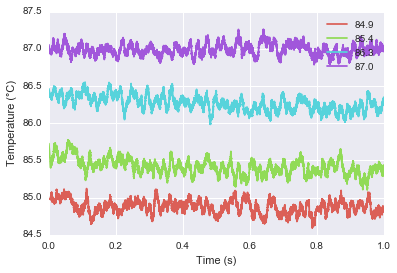

In [4]:
#SFB PLOT

fig = plt.figure()
sns.set_palette("hls", len(exponentialHolder))  
palette = itertools.cycle(sns.color_palette())
for expIndex, expElements in enumerate(exponentialHolder):
    vv = next(palette)
    plt.plot(expElements[6][:1000000], expElements[13][:1000000] , color=vv, 
             label=str(round(np.mean(expElements[14][:1000000]),1)) )
   
degree1= u'\N{DEGREE SIGN}'
plt.ylabel('Temperature '+ '(' +degree1+'C)')
plt.xlabel('Time (s)')


fig.savefig(fileDirectory+fileNameSuffix+'_SFB.png', dpi=2000)
plt.legend()
fig.savefig(fileDirectory+fileNameSuffix+'_SFB_legend.png', dpi=2000)
gc.collect()



5949

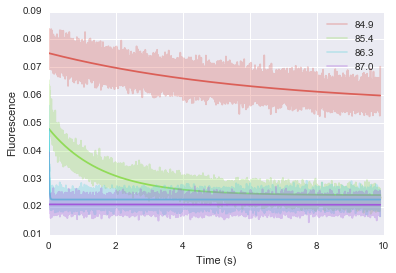

In [5]:
#PLOT EXPONENTIAL

fig = plt.figure()
sns.set_palette("hls", len(exponentialHolder))  
palette = itertools.cycle(sns.color_palette())
for expIndex, expElements in enumerate(exponentialHolder):
    vv = next(palette)
    plt.plot(expElements[6], expElements[3], color=vv)
    plt.plot(expElements[6], expElements[7], alpha=.3, color=vv, 
             label=str(round(np.mean(expElements[14][:1000000]),1)) )

plt.ylabel('Fluorescence')
plt.xlabel('Time (s)')

fig.savefig(fileDirectory+fileNameSuffix+'_EXPONENTIAL.png', dpi=1000)
plt.legend()
fig.savefig(fileDirectory+fileNameSuffix+'_EXPONENTIAL_legend.png', dpi=1000)
gc.collect()

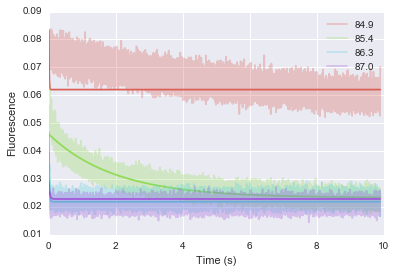

In [6]:
#LINEAR PLOT

fig = plt.figure()
sns.set_palette("hls", len(linearHolder))  
palette = itertools.cycle(sns.color_palette())
for linIndex, linElements in enumerate(linearHolder):
    vv = next(palette)
    if(np.isfinite(linElements[6]) and (linElements[9]<0)):
        plt.plot(linElements[7], linElements[3], color=vv)
    plt.plot(linElements[7], linElements[8], alpha=.3, color=vv
            , label=str(round(np.mean(linElements[18][:1000000]), 1)))

plt.ylabel('Fluorescence')
plt.xlabel('Time (s)')
            
fig.savefig(fileDirectory+fileNameSuffix+'_LINEAR.png',  dpi=1000)
plt.legend()
fig.savefig(fileDirectory+fileNameSuffix+'_LINEAR_legend.png',  dpi=1000)

AAAAAAAAAAA
AAAAAAAAAAA
AAAAAAAAAAA
AAAAAAAAAAA


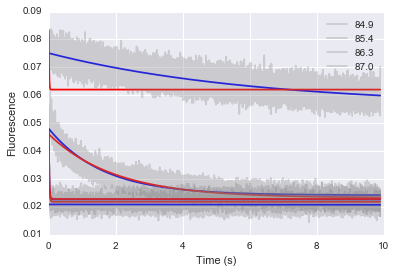

In [7]:
#Both linear and Exponential Plot
fig = plt.figure()

for expIndex, expElements in enumerate(exponentialHolder):
    for linIndex, linElements in enumerate(linearHolder):
        if(expElements[0][:24] in linElements[0]):
            print('AAAAAAAAAAA')
            plt.plot(expElements[6], expElements[3], color='b')
            if(np.isfinite(linElements[6]) and (linElements[9]<0)):
                plt.plot(linElements[7], linElements[3], color='r')
            plt.plot(linElements[7], linElements[8], color='grey', alpha=.3,
                     label=str(round(np.mean(expElements[14][:1000000]),1)) )
            
          

plt.ylabel('Fluorescence')
plt.xlabel('Time (s)')
            
fig.savefig(fileDirectory+fileNameSuffix+'_LINEAR_EXP.png', dpi=1000)
plt.legend()
fig.savefig(fileDirectory+fileNameSuffix+'_LINEAR_EXP_legend.png', dpi=1000)

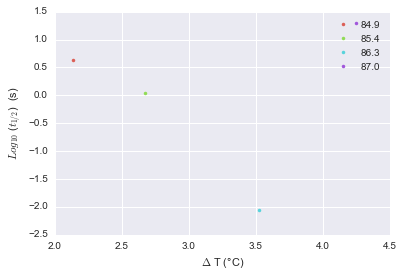

In [8]:
#LOG PLOT OF EXPONENTIAL FIT
fig = plt.figure()

for expIndex, expElements in enumerate(exponentialHolder):
    plt.plot(np.mean(expElements[14][:1000000])-expElements[1],np.log10(np.log(2)/abs(expElements[8])),'.',
            label=str(round(np.mean(expElements[14][:1000000]),1)))



plt.ylabel('$Log_{10}$'+' '+'($t_{1/2}$)'+ ' '+' (s)')
degree1= u'\N{DEGREE SIGN}'
plt.xlabel('$\Delta$' +' T '+ '(' +degree1+'C)')
fig.savefig(fileDirectory+fileNameSuffix+'_halflife.png',  dpi=1000)
plt.legend()
fig.savefig(fileDirectory+fileNameSuffix+'_halflife_legend.png',  dpi=1000)